# Multiple linear regression

## Import the relevant libraries

In [8]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [9]:
# Load the data from a .csv in the same folder
data = pd.read_csv('1.02. Multiple linear regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [10]:
# This method gives us very nice descriptive statistics. We don't need this for now, but will later on!
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


## Create the multiple linear regression

### Declare the dependent and independent variables

In [11]:
# There are two independent variables: 'SAT' and 'Rand 1,2,3'
x = data[['SAT','Rand 1,2,3']]

# and a single depended variable: 'GPA'
y = data['GPA']

### Regression itself

In [12]:
# We start by creating a linear regression object
reg = LinearRegression()

# The whole learning process boils down to fitting the regression
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Getting the coefficients of the regression
m=reg.coef_
print(m)
# Note that the output is an array

[ 0.00165354 -0.00826982]


In [15]:
# Getting the intercept of the regression
c=reg.intercept_
# Note that the result is a float as we usually expect a single value

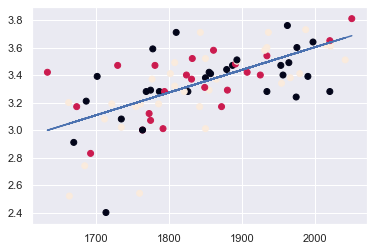

In [22]:
plt.scatter(x['SAT'],y,c=x['Rand 1,2,3'])
x1=x['SAT']
plt.plot(x1,m[0]*x1+c)

### Calculating the R-squared

In [27]:
# Get the R-squared of the regression
r2=reg.score(x,y)

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [28]:
# Get the shape of x, to facilitate the creation of the Adjusted R^2 metric
x.shape

(84, 2)

In [29]:
# If we want to find the Adjusted R-squared we can do so by knowing the r2, the # observations, the # features
r2 = reg.score(x,y)
# Number of observations is the shape along axis 0
n = x.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = x.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

## Feature selection (Getting p value of each features)

Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

In [30]:
# Import the feature selection module from sklearn
# This module allows us to select the most appopriate features for our regression
# There exist many different approaches to feature selection, however, we will use one of the simplest
from sklearn.feature_selection import f_regression

In [32]:
# We will look into: f_regression
# f_regression finds the F-statistics for the *simple* regressions created with each of the independent variables
# In our case, this would mean running a simple linear regression on GPA where SAT is the independent variable
# and a simple linear regression on GPA where Rand 1,2,3 is the indepdent variable
# The limitation of this approach is that it does not take into account the mutual effect of the two features
f_regression(x,y)

# There are two output arrays
# The first one contains the F-statistics for each of the regressions
# The second one contains the p-values of these F-statistics

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [33]:
# Since we are more interested in the latter (p-values), we can just take the second array
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [34]:
# To be able to quickly evaluate them, we can round the result to 3 digits after the dot
p_values.round(3)

array([0.   , 0.676])

## Creating a summary table

In [35]:
# Let's create a new data frame with the names of the features 
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features']) 
reg_summary   #data will have row values and colums just give name

,Features
0,SAT
1,"Rand 1,2,3"


In [36]:
# Then we create and fill a second column, called 'Coefficients' with the coefficients of the regression
reg_summary ['Coefficients'] = reg.coef_
# Finally, we add the p-values we just calculated
reg_summary ['p-values'] = p_values.round(3)

In [37]:
# Now we've got a pretty clean summary, which can help us make an informed decision about the inclusion of the variables 
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


In [ ]:
## Standardization

In [39]:
# Import the preprocessing module
# StandardScaler is one of the easiest and 'cleanest' ways to preprocess your data
from sklearn.preprocessing import StandardScaler

In [40]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

In [41]:
# Fit the input data (x)
# Essentially we are calculating the mean and standard deviation feature-wise 
# (the mean of 'SAT' and the standard deviation of 'SAT', 
# as well as the mean of 'Rand 1,2,3' and the standard deviation of 'Rand 1,2,3')
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
# The actual scaling of the data is done through the method 'transform()'
# Let's store it in a new variable, named appropriately
x_scaled = scaler.transform(x)

In [44]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

## Regression with scaled features

In [45]:
# Creating a regression works in the exact same way
reg = LinearRegression()

# We just need to specify that our inputs are the 'scaled inputs'
reg.fit(x_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Let's see the coefficients
reg.coef_

array([ 0.17181389, -0.00703007])

In [47]:
# And the intercept
reg.intercept_

3.330238095238095

## Creating a summary table

In [48]:
# As usual we can try to arrange the information in a summary table
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']], columns=['Features'])

# Then we create and fill a second column, called 'Weights' with the coefficients of the regression
# Since the standardized coefficients are called 'weights' in ML, this is a much better word choice for our case
# Note that even non-standardized coeff. are called 'weights' 
# but more often than not, when doing ML we perform some sort of scaling
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [49]:
# Now we have a pretty clean summary, which can help us make an informed decision about the importance of each feature
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


## Making predictions with the standardized coefficients (weights)

In [50]:
# For simplicity, let's crete a new dataframe with 2 *new* observations
new_data = pd.DataFrame(data=[[1700,2],[1800,1]],columns=['SAT','Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [51]:
# We can make a prediction for a whole dataframe (not a single value)
# Note that the output is very strange (different from mine)
reg.predict(new_data)

array([295.39979563, 312.58821497])

In [52]:
# Our model is expecting SCALED features (features of different magnitude)
# In fact we must transform the 'new data' in the same way as we transformed the inputs we train the model on
# Luckily for us, this information is contained in the 'scaler' object
# We simply transform the 'new data' using the relevant method
new_data_scaled = scaler.transform(new_data)

# Let's check the result
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [53]:
# Finally we make a prediction using the scaled new data
reg.predict(new_data_scaled)
# The output is much more appropriate, isn't it?

array([3.09051403, 3.26413803])

## What if we removed the 'Random 1,2,3' variable?

In [56]:
# Theory suggests that features with very small weights could be removed and the results should be identical
# Moreover, we proved in 2-3 different ways that 'Rand 1,2,3' is an irrelevant feature
# Let's create a simple linear regression (simple, because there is a single feature) without 'Rand 1,2,3'
reg_simple = LinearRegression()

# Once more, we must reshape the inputs into a matrix, otherwise we will get a compatibility error 
# Note that instead of standardizing again, I'll simply take only the first column of x
x_simple_matrix = x_scaled[:,0].reshape(-1,1)

# Finally, we fit the regression
reg_simple.fit(x_simple_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# In a similar manner to the cell before, we can predict only the first column of the scaled 'new data'
# Note that we also reshape it to be exactly the same as x
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])